In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import f1_score

learning_rate = 0.001

def create_linear_model():
    def get_data():
        df = pd.read_csv('data.csv', sep = ',')
        np_arr = df.values
        X = np_arr[:, [0]]
        y = np_arr[:, [1]]
        return X, y    

    def normalize_data(X, y):
        X_tmp = X
        y_tmp = y

        X = (X - np.min(X)) / (np.max(X) - np.min(X))
        y = (y - np.min(y)) / (np.max(y) - np.min(y))
        return X_tmp, y_tmp, X, y

    def init_weights():
        tmp_tetha0 = np.array([1 for x in range (24)])
        tmp_tetha0 = tmp_tetha0.reshape(-1, 1)
        tmp_tetha1 = np.zeros((len(X), 1))
        return tmp_tetha0, tmp_tetha1

    def own_linear_regression(tmp_tetha0, tmp_tetha1, X, y, learning_rate, get_data):
        tetha0, tetha1 = tmp_tetha0, tmp_tetha1
        epochs = 0
        tmp_mae = np.sum(X * tmp_tetha1 + tmp_tetha0 - y)
        R = None
        while (epochs < 100000):
            mae = np.sum(X * tmp_tetha1 + tmp_tetha0 - y)
            if (mae < tmp_mae):
                tetha0, tetha1 = tmp_tetha0, tmp_tetha1
                tmp_mae = mae
            tmp_tetha0 = tmp_tetha0 - learning_rate * 2 * (np.sum(mae) / 24)  
            tmp_tetha1 = tmp_tetha1 - learning_rate * 2 *  (np.sum(X * mae) / 24)
            epochs += 1
        return tetha0, tetha1

    def get_norm_data_for_linear_regression(tetha0, tetha1):
        x = np.array([x for x in range(0, 2)])
        d = np.array([x*tetha1[0][0] + tetha0[0] for x in range(0, 2)])
        return x, d

    def denorm(X, y, X_tmp, y_tmp, km):
        km = (km - np.min(X_tmp)) / (np.max(X_tmp) - np.min(X_tmp))

        x = np.array([x for x in range(0, 2)])
        d = np.array([x*tetha1[0] + tetha0[0] for x in range(0, 2)])
        plt.scatter(X, y, color="black")
        plt.scatter(np.array([km]), np.array([km * tetha1[0][0] + tetha0[0]]), color="red")
        plt.plot(x, d)

        x_min = np.min(X_tmp)
        x_max = np.max(X_tmp)
        y_min = np.min(y_tmp)
        y_max = np.max(y_tmp)

        cnt = 0
        x = np.array([])
        y = np.array([])
        while (cnt < 1):
            x = np.append(x, cnt)
            y = np.append(y, cnt*tetha1[0] + tetha0[0])
            cnt += 0.02

        denorm_x_regr = x * (x_max - x_min) + x_min
        denorm_y_regr = y * (y_max - y_min) + y_min
        return denorm_x_regr, denorm_y_regr, x_min, x_max, y_min, y_max, km        
    
    def calculate_precision(y, X, tmp_tetha1, tmp_tetha0):
        u = ((y - X * tmp_tetha1 + tmp_tetha0)**2).sum()
        v = ((y - y.mean())**2).sum()
        R = 1 - u/v
        return R
    
    X, y = get_data()
    X_tmp, y_tmp, X, y = normalize_data(X, y)
    tmp_tetha0, tmp_tetha1 = init_weights()
    tetha0, tetha1 = own_linear_regression(tmp_tetha0, tmp_tetha1, X, y, learning_rate, get_data)
    R = calculate_precision(y, X, tetha1, tetha0)
    x, d = get_norm_data_for_linear_regression(tetha0, tetha1)
    km = None
    while(type(km) != int or (type(km) == int and km < 0)):
        try:
            km = int(input("Введите пробег вашего автомобиля: "))
        except ValueError as e:
            print(e.__str__())
        if (type(km) != int):
            print("Введите число!\n")
        elif (type(km) == int and km < 0):
            print("Введите положительное целое число!\n")
    denorm_x_regr, denorm_y_regr, x_min, x_max, y_min, y_max, km = denorm(X, y, X_tmp, y_tmp, km)
    return denorm_x_regr, denorm_y_regr, x_min, x_max, y_min, y_max, km, get_data, tetha0, tetha1, R

tetha0 = np.zeros(24)
tetha1 = np.zeros(24)
X, y = get_data()
X_tmp, Y_tmp, X, y = normalize_data(X, y)
tetha0, tetha1 = own_linear_regression(tmp_tetha0, tmp_tetha1, X, y, learning_rate)
plt.scatter(X, y, color="black")
x, d = get_norm_data_for_linear_regression(tetha0, tetha1)
plt.plot(x, d)

In [26]:
def predict(denorm_x_regr, denorm_y_regr, x_min, x_max, y_min, y_max, km, get_data, tetha0, tetha1):
    
    X, y = get_data()
    
    plt.scatter(X, y, color="black")
    plt.scatter(denorm_x_regr, denorm_y_regr, color="green")
    price = km * tetha1[0] + tetha0[0]
    denorm_km = km * (x_max - x_min) + x_min
    denorm_price = price * (y_max - y_min) + y_min
    plt.scatter(denorm_km, denorm_price, color="blue")
    
    if (denorm_price < 0):
        denorm_price = 0
    elif (denorm_price - int(denorm_price) >= 0.5):
        denorm_price = math.ceil(denorm_price)
    else:
        denorm_price = math.floor(denorm_price)
    
    if (denorm_km - int(denorm_km) >= 0.5):
        denorm_km = math.ceil(denorm_km)
    else:
        denorm_km = math.floor(denorm_km)
    
    
    print(f"Учитывая пробег автомобиля - {denorm_km} км, его стоимость составляет {denorm_price} долларов")

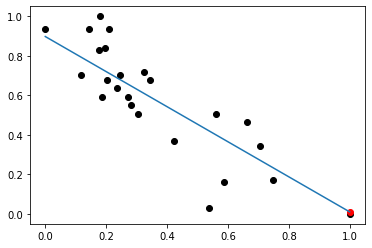

In [27]:
denorm_x_regr, denorm_y_regr, x_min, x_max, y_min, y_max, km, get_data, tetha0, tetha1, R = create_linear_model()

Учитывая пробег автомобиля - 240000 км, его стоимость составляет 3698 долларов
Precision is -40.82810476803418


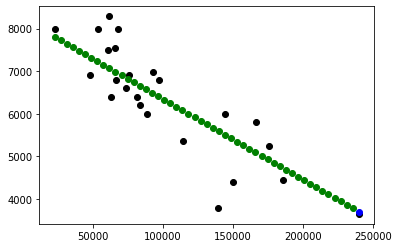

In [28]:
predict(denorm_x_regr, denorm_y_regr, x_min, x_max, y_min, y_max, km, get_data, tetha0, tetha1)
print(f"Precision is {R}")